In [1]:
from ipynb.fs.full.extractfeatures import extract_features, extract_file_features;
from ipynb.fs.full.textPreprocessor import processText;
from ipynb.fs.full.testData import load_clean_descriptions_photo_features;
from ipynb.fs.full.testData import create_tokenizer_max_length, create_sequences, create_sequences2;
from ipynb.fs.full.evaluate import evaluate_model, generate_desc;
from ipynb.fs.full.model import define_model;
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import pandas as pd
from pickle import dump
import os;  

/home/gis-local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/gis-local/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [2]:
# create image feature file and cleaned description of image file
if (os.path.exists("./features.pkl") ==  False):
    extract_features("../../flickr8k_dataset/Flickr8k_Dataset/Flicker8k_Dataset", "./features.pkl")
if (os.path.exists("./descriptions.txt") ==  False):
    vocabulary = processText("../../flickr8k_dataset/Flickr8k_text/Flickr8k.token.txt", "./descriptions.txt")

In [3]:
# prepare train dataset with startseq desc endseq.
train_descriptions, train_features  = load_clean_descriptions_photo_features("./descriptions.txt", "/home/gis-local/Desktop/built.io/deepakWork/flickr8k_dataset/Flickr8k_text/Flickr_8k.trainImages.txt", "./features.pkl")
# prepare tokenizer and determine max length of desc
tokenizer, max_length, vocab_size = create_tokenizer_max_length(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34


In [4]:
# prepare sequences
# X1train, X2train, ytrain = create_sequences2(tokenizer, max_length, train_descriptions, train_features, vocab_size)

In [5]:
# X1train.shape, X2train.shape, ytrain.shape, ytrain

In [6]:
# prepare test dataset with startseq desc endseq.
# test_descriptions, test_features  = load_clean_descriptions_photo_features("./descriptions.txt", "/home/gis-local/Desktop/built.io/deepakWork/flickr8k_dataset/Flickr8k_text/Flickr_8k.testImages.txt", "./features.pkl")
# prepare sequences
# X1test, X2test, ytest= create_sequences2(tokenizer, max_length, test_descriptions, test_features, vocab_size)


In [7]:
# define the model
# model = define_model(vocab_size, max_length)
# define checkpoint callback
# filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# # fit model
# model.fit([X1train, X2train], ytrain, epochs=1, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

In [8]:
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length):
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            # retrieve the photo feature
            photo = photos[key][0]
            in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
            yield [[in_img, in_seq], out_word]
            
# run in progressive loading if you don't have enough memory
# train the model, run epochs manually and save after each epoch
epochs = 20
steps = len(train_descriptions)

# Keras supports progressively loaded datasets by using the fit_generator() function on the model.
if(False):        
    for i in range(epochs):
        print("runnning epochs:", i)
        # create the data generator
        generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
        # fit for one epoch
        model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
        # save model
        model.save('model_' + str(i) + '.h5')

In [9]:
if(False):
    for i in range(epochs):
        filename = 'model_' + str(i) + '.h5'
        print("model: ", filename)
        model = load_model(filename)
        evaluate_model(model, test_descriptions, test_features, tokenizer, max_length, filename)
        
score = pd.read_excel('./accuracy.xlsx')
score.head()

,model_0.h5,model_1.h5,model_2.h5,model_3.h5,model_4.h5,model_5.h5,model_6.h5,model_7.h5,model_8.h5,model_9.h5,model_10.h5,model_11.h5,model_12.h5,model_13.h5,model_14.h5,model_15.h5,model_16.h5,model_17.h5,model_18.h5,model_19.h5
0,0.573657,0.567296,0.538082,0.544224,0.523713,0.530718,0.516729,0.511089,0.487360,0.489485,0.481552,0.461752,0.473804,0.485990,0.482606,0.463460,0.473922,0.493158,0.486005,0.495794
1,0.312852,0.312266,0.289131,0.284301,0.275027,0.281031,0.267422,0.268511,0.248749,0.250133,0.243579,0.237069,0.243421,0.250072,0.253108,0.230890,0.237894,0.248501,0.255177,0.258391
2,0.203172,0.208547,0.190911,0.181290,0.186097,0.190347,0.178061,0.182256,0.165621,0.167588,0.161217,0.158745,0.166174,0.167141,0.172987,0.151392,0.155983,0.164025,0.178485,0.176850
3,0.089967,0.092988,0.082026,0.073456,0.082815,0.085779,0.077459,0.081385,0.070595,0.073120,0.068494,0.068546,0.074769,0.073279,0.078606,0.064163,0.064333,0.071238,0.083905,0.078580


In [10]:
# load and prepare the photograph
from IPython.core.display import Image, display
from datetime import datetime

def predict(image):
    a = datetime.now()
    display(Image(filename=image)) 
    photo = extract_file_features(image)
#     x = [3, 9, 15, 16, 19]
#     for i in x:
    for i in range(epochs):
        # load the model
        model = load_model('model_'+str(i)+'.h5')
        # generate description
        description = generate_desc(model, tokenizer, photo, max_length)
        description = description.replace("startseq", "")
        description = description.replace("endseq", "")
        print(i, ":", description)
    print("time: ", (a - datetime.now()).seconds)

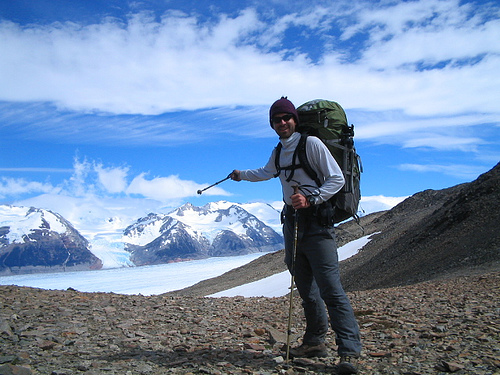

0 :  man is riding bike on the mountains 
1 :  man is climbing rock 
2 :  man in red shirt is standing on the beach 
3 :  man in red shirt is standing on the beach 
4 :  man in red shirt is standing on the top of the side of the side of the mountain 
5 :  man in red shirt is climbing up rock face 
6 :  man in red shirt is climbing up rock 
7 :  man in red shirt is climbing up rock face 
8 :  man in red shirt is climbing up rock 
9 :  man in red shirt is climbing up rock face 
10 :  man in red shirt is climbing up rock face 
11 :  man in red pants is climbing up snowy mountain 
12 :  man in red shirt is climbing up rock face 
13 :  man in red shirt is climbing up rock 
14 :  man in red shirt is climbing up snowy mountain 
15 :  man in red shirt is climbing up mountain 
16 :  man in red shirt is climbing up snowy mountain 
17 :  man in red shirt is climbing up rock 
18 :  man in red shirt is climbing up snowy mountain 
19 :  man in red shirt is climbing up rock 
time:  86323


In [11]:
predict('54501196_a9ac9d66f2.jpg')